In [22]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [23]:
def v_source_func(omega = 1, A = 1, phi = 0):
    """
    Defines the source voltage function as a sinusoidal wave changing with respect to time
    Parameters:
        t: Single value representing time, or array of time steps
        A: Amplitude of the sine wave, assumed equal to 1
        phi: Phase shift of the wave, assumed equal to 0
    Returns:
        The function of a standard sine wave A*sin(w*t+phi) with the given parameters
    """
    def v_source(t, omega = omega, A = A, phi = phi):
        return A * np.sin(omega * t + phi)
    
    return v_source

In [54]:
def make_system():
    init = State(Q = 0, V_C = 0)
    
    t0 = 0
    t_end = 1
    
    return System(init=init, t0 = t0, t_end = t_end, 
                  v_s = v_source_func(omega = 60, A = 120, phi = 0), 
                  R = 0.03, C = 0.022)

In [55]:
def slope_function(state, t, system):
    
    Q, V_C = state
    
    rectified_V_source = np.abs(system.v_s(t))
    
    V_inductor = rectified_V_source - V_C
    
    if V_inductor > 0:
        dQdt = V_inductor / system.R
        dVcdt = dQdt / system.C
    else:
        dQdt = - Q / (system.R * system.C)
        dVcdt = dQdt / system.C
    return dQdt, dVcdt

In [56]:
system = make_system()

,values
init,Q 0 V_C 0 dtype: int64
t0,0
t_end,1
v_s,<function v_source_func.<locals>.v_source at 0...
R,0.03
C,0.022


In [57]:
slope_function(system.init, 1, system)

(1219.2424844088669, 55420.11292767577)

In [58]:
results, details = run_ode_solver(system, slope_function)

In [59]:
results

,Q,V_C
0.000000,0.000000,0.000000
0.000100,0.001142,0.051892
0.000360,0.013081,0.594590
0.000772,0.050185,2.281125
0.001342,0.121658,5.529892
0.002099,0.231955,10.543431
0.003105,0.386704,17.577475
0.004492,0.601387,27.335771
0.006445,0.896902,40.768260
0.008465,1.189487,54.067593


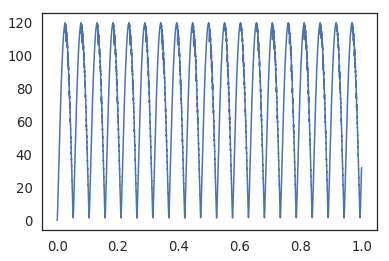

In [60]:
results.V_C.plot()